In [62]:
%matplotlib inline

# **Load the dataset**

In [63]:
import json

with open('data.json', 'r') as file:
  content = file.read()
dataset = json.loads(content)

In [ ]:
dataset

In [65]:
x = []
y = []

for item in dataset:
  y.append(item['label'])
  ap_map = dict()
  for ap in item['ap_list']:
    ap_map[ap['ssid_bssid']] = ap['signal_strength']
  x.append(ap_map)

print(y)
print(x)

['yat-chanakya room', 'yat-chanakya room', 'yat-chanakya room', 'yat-chanakya room', 'yat-chanakya room', 'yat-chanakya room', 'yat-chanakya room', 'center hall', 'center hall', 'center hall', 'center hall', 'center hall', 'center hall', 'kitchen', 'kitchen', 'kitchen', 'kitchen', 'kitchen', 'kitchen', 'kitchen', 'kitchen', 'kitchen', 'kitchen', 'kitchen', 'kitchen', 'guptesh room', 'guptesh room', 'guptesh room', 'guptesh room', 'guptesh room', 'guptesh room', 'guptesh room', 'guptesh room', 'guptesh room', 'guptesh room', 'guptesh room', 'guptesh room']
[{'Crucio b4:a7:c6:b5:ee:e6': -44, 'Avada Kedavra b4:a7:c6:b5:ee:e7': -63, 'Emerald_5G 6c:df:fb:2e:c5:e2': -81, 'Personal_hotspot 6e:df:fb:2e:c5:e2': -81, 'Emerald_2G 6c:df:fb:2e:c5:e1': -81, 'Suraj f4:f2:6d:4f:8f:ca': -83, 'saanvika 70:97:41:cf:52:50': -85, 'Mohan kumar_5GHz f8:0c:58:73:87:6d': -86, ' fa:0c:58:43:87:6d': -87}, {'Crucio b4:a7:c6:b5:ee:e6': -53, 'Avada Kedavra b4:a7:c6:b5:ee:e7': -63, 'yuktha 70:97:41:cf:52:4f': -79, '

# **Data preprocessing**

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

dictVectorizer = DictVectorizer(sparse=False)
label_encoder = LabelEncoder()

X = dictVectorizer.fit_transform(x)
Y = label_encoder.fit_transform(y)

X, Xt, Y, Yt = train_test_split(X, Y, test_size=0.33, random_state=42)

In [67]:
print(len(X))
print(len(Y))

print(len(Xt))
print(len(Yt))

24
24
13
13


### **k-Nearest Neighbour classifier**

In [68]:
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [71]:
from sklearn.neighbors import KNeighborsClassifier
neighbours = [2*k + 1 for k in range(1, 10)]
accuracies = []
for n in neighbours:
  clf = KNeighborsClassifier(n_neighbors=n)
  clf.fit(X, Y)
  accuracies.append(accuracy_score(Yt, clf.predict(Xt)))

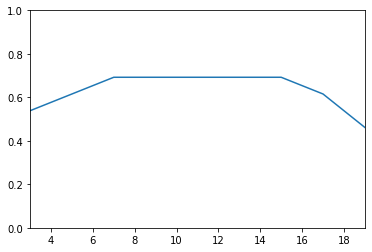

In [72]:
plt.xlim([neighbours[0], neighbours[-1]])
plt.ylim([0, 1])
plt.plot(neighbours, accuracies)

From the above plot we notice that n = 7 produces the best results on an average, hence that is the model we will consider

In [73]:
knn_acc = accuracies[2]
knn_acc

0.6923076923076923